In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


# Loading Images and Labels

In [ ]:
import os
from PIL import Image
import numpy as np
import re

def load_images_and_labels(main_folder):
    images = []
    labels = []

    # Traverse through the main folder
    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)

        for subsubfolder in os.listdir(subfolder_path):
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)

            for filename in os.listdir(subsubfolder_path):
                file_path = os.path.join(subsubfolder_path, filename)

                # Check if the file_path is a file (not a directory)
                if os.path.isfile(file_path):
                    # Extract 'class1' or 'class0' from the filename just before '.png'
                    match = re.search(r'class([01])\.png$', filename)
                    if match:
                        label = int(match.group(1))

                        # Read and process the image
                        try:
                            img = Image.open(file_path)
                            # Add the image and label to the lists
                            images.append(np.array(img))
                            labels.append(label)
                            print(f"Successfully read: {file_path}, Label: {label}")
                        except Exception as e:
                            print(f"Error reading {file_path}: {str(e)}")

    return np.array(images), np.array(labels)

# Specify the path to the main folder
main_folder_path = '/content/drive/My Drive/ImageData'

# Load images and labels
images, labels = load_images_and_labels(main_folder_path)

# Print the shape of the loaded data
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)


Streaming output truncated to the last 5000 lines.
Successfully read: /content/drive/My Drive/ImageData/8864/0/8864_idx5_x451_y1501_class0.png, Label: 0
Successfully read: /content/drive/My Drive/ImageData/8864/0/8864_idx5_x51_y2251_class0.png, Label: 0
Successfully read: /content/drive/My Drive/ImageData/8864/0/8864_idx5_x901_y2901_class0.png, Label: 0
Successfully read: /content/drive/My Drive/ImageData/8864/0/8864_idx5_x601_y2901_class0.png, Label: 0
Successfully read: /content/drive/My Drive/ImageData/8864/0/8864_idx5_x401_y1501_class0.png, Label: 0
Successfully read: /content/drive/My Drive/ImageData/8864/0/8864_idx5_x651_y1401_class0.png, Label: 0
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x601_y951_class1.png, Label: 1
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x1251_y751_class1.png, Label: 1
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x701_y751_class1.png, Label: 1
Successfully read: /content/drive/

<ipython-input-2-f33748b0fcf3>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


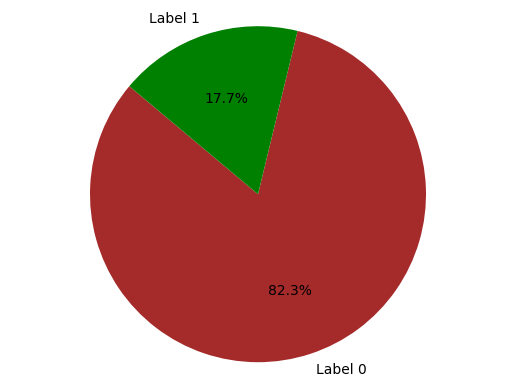

Count_0 = 8044
Count_1 = 1727


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your NumPy array containing 0s and 1s
data = np.array(labels)  # Replace this with your actual data

# Count occurrences of 0s and 1s
count_0 = np.count_nonzero(data == 0)
count_1 = np.count_nonzero(data == 1)

# Data for the pie chart
sizes = [count_0, count_1]

# Labels for each segment
Tags = ['Label 0', 'Label 1']

# Colors for each segment
colors = ['brown', 'green']

# Create pie chart
plt.pie(sizes, labels= Tags, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

print(f"Count_0 = {count_0}")
print(f"Count_1 = {count_1}")

#Balancing Dataset

In [ ]:
import numpy as np

# Assuming 'labels' is your NumPy array containing 0s and 1s
# Assuming you want to have only 1700 samples for each class

# Indices of class 0 and class 1
indices_class_0 = np.where(labels == 0)[0]
indices_class_1 = np.where(labels == 1)[0]

# Randomly shuffle indices to ensure randomness in the selected samples
np.random.shuffle(indices_class_0)
np.random.shuffle(indices_class_1)

# Number of samples to keep for each class
keep_count = 1700

# Keep samples for class 0
indices_to_keep_class_0 = indices_class_0[:keep_count]
labels_class_0_balanced = labels[indices_to_keep_class_0]
images_class_0_balanced = images[indices_to_keep_class_0]

# Keep samples for class 1
indices_to_keep_class_1 = indices_class_1[:keep_count]
labels_class_1_balanced = labels[indices_to_keep_class_1]
images_class_1_balanced = images[indices_to_keep_class_1]

# Concatenate the balanced datasets
balanced_labels = np.concatenate((labels_class_0_balanced, labels_class_1_balanced), axis=0)
balanced_images = np.concatenate((images_class_0_balanced, images_class_1_balanced), axis=0)

# Print the shape of the balanced dataset
print("Shape of balanced images:", balanced_images.shape)
print("Shape of balanced labels:", balanced_labels.shape)


Shape of balanced images: (3400,)
Shape of balanced labels: (3400,)


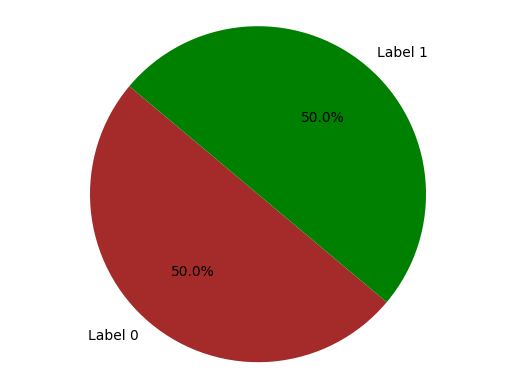

Count_0 = 1700
Count_1 = 1700


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is your NumPy array containing 0s and 1s
data = np.array(balanced_labels)  # Replace this with your actual data

# Count occurrences of 0s and 1s
count_0 = np.count_nonzero(data == 0)
count_1 = np.count_nonzero(data == 1)

# Data for the pie chart
sizes = [count_0, count_1]

# Labels for each segment
Tags = ['Label 0', 'Label 1']

# Colors for each segment
colors = ['brown', 'green']

# Create pie chart
plt.pie(sizes, labels= Tags, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that the pie chart is circular
plt.axis('equal')

# Display the pie chart
plt.show()

print(f"Count_0 = {count_0}")
print(f"Count_1 = {count_1}")

In [ ]:
images = balanced_images
labels = balanced_labels

#Resizing Images and Label arrays

In [ ]:
from PIL import Image
import numpy as np

def resize_images(images, target_size=(256, 256)):
    resized_images = []

    for img_array in images:
        img = Image.fromarray(img_array)
        resized_img = img.resize(target_size)
        resized_images.append(np.array(resized_img))

    return np.array(resized_images)

# Assuming you have loaded images and stored them in the 'images' variable
# Specify the target size for resizing
target_size = (256, 256)

# Resize the images
resized_images = resize_images(images, target_size)

# Print the shape of the resized images
print("Shape of resized images:", resized_images.shape)


Shape of resized images: (3400, 256, 256, 3)


In [ ]:
import numpy as np

# Assuming 'labels' is your current label array
# Reshape labels to (9801, 1)
labels_reshaped = labels.reshape(-1, 1)

# Print the shape of the reshaped labels
print("Shape of reshaped labels:", labels_reshaped.shape)


Shape of reshaped labels: (3400, 1)


#Normalization

In [ ]:
import numpy as np

# Assuming 'resized_images' is your current image array
# Normalize pixel values to the range [0, 1]
normalized_images = resized_images.astype('float32') / 255.0

# Print the minimum and maximum values after normalization
print("Min pixel value after normalization:", np.min(normalized_images))
print("Max pixel value after normalization:", np.max(normalized_images))


Min pixel value after normalization: 0.0
Max pixel value after normalization: 1.0


##Viewing Normalized Images

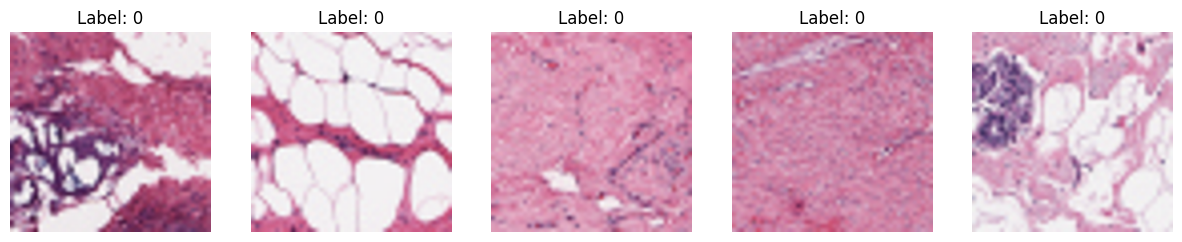

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'normalized_images' and 'labels_reshaped' are your image and label arrays
# Replace these variables with your actual data

# Function to display images with labels
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        # Display image
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(f"Label: {labels[i][0]}")

    plt.show()

# Display the first 5 images along with their labels
display_images(normalized_images, labels_reshaped, num_images=5)


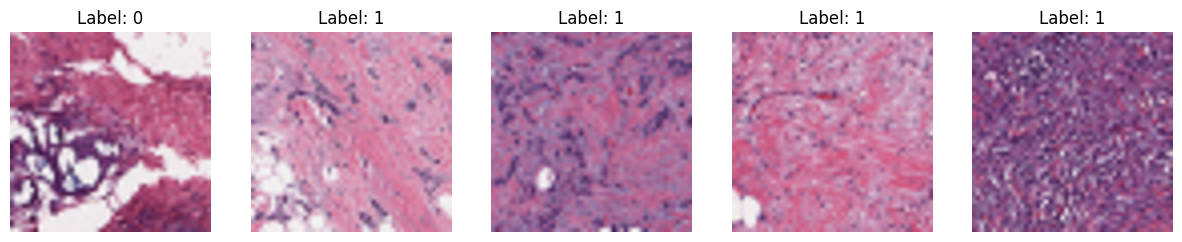

In [ ]:
# Function to display images with labels
def display_images(images, labels, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

    for i in range(num_images):
        # Display image
        axes[i].imshow(images[ -1* i])
        axes[i].axis('off')
        axes[i].set_title(f"Label: {labels[ -1 * i][0]}")

    plt.show()

# Display the first 5 images along with their labels
display_images(normalized_images, labels_reshaped, num_images=5)

In [ ]:
# Assuming 'images', 'labels', and 'resized_images' are the variables you want to delete
del images
del labels
del resized_images
del balanced_images
del balanced_labels


#Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'resized_images' and 'reshaped_labels' are your image and label arrays
# Replace these variables with your actual data

# Split the data into training (70%), validation (20%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(normalized_images, labels_reshaped, test_size=0.3, random_state=100)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=100)

# Print the shapes of the split datasets
print("Shape of training images:", X_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)
print("Shape of test images:", X_test.shape)
print("Shape of test labels:", y_test.shape)


Shape of training images: (2380, 256, 256, 3)
Shape of training labels: (2380, 1)
Shape of validation images: (680, 256, 256, 3)
Shape of validation labels: (680, 1)
Shape of test images: (340, 256, 256, 3)
Shape of test labels: (340, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# Assuming 'y_train', 'y_val', and 'y_test' are your label arrays

# One-hot encode training labels
y_train_one_hot = to_categorical(y_train, num_classes=2)

# One-hot encode validation labels
y_val_one_hot = to_categorical(y_val, num_classes=2)

# One-hot encode test labels
y_test_one_hot = to_categorical(y_test, num_classes=2)

# Print the shapes of the one-hot encoded labels
print("Shape of one-hot encoded training labels:", y_train_one_hot.shape)
print("Shape of one-hot encoded validation labels:", y_val_one_hot.shape)
print("Shape of one-hot encoded test labels:", y_test_one_hot.shape)


Shape of one-hot encoded training labels: (2380, 2)
Shape of one-hot encoded validation labels: (680, 2)
Shape of one-hot encoded test labels: (340, 2)


#CNN Model

In [ ]:
model = 0
history = 0

In [ ]:
import tensorflow as tf

# Assuming the input shape is (256, 256, 3)
input_shape = (256, 256, 3)

# Create a Sequential model
model = tf.keras.Sequential([
    # Convolutional layer with 32 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 2x2 pool size and default stride (2)
    tf.keras.layers.MaxPooling2D(strides=2),

    # Convolutional layer with 64 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    # Convolutional layer with 128 filters, a 3x3 kernel, 'same' padding, and ReLU activation
    tf.keras.layers.Conv2D(130, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # MaxPooling layer with a 3x3 pool size and stride of 2
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),



    # Fully connected layer with 128 units and ReLU activation
    tf.keras.layers.Dense(130, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    tf.keras.layers.Dense(130, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((3, 3), strides=2),

    # Flatten the output to prepare for fully connected layers
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.5),
    # Output layer with 2 units (binary classification) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

# Display a summary of the model architecture
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
# Compile the model with Adam optimizer, binary cross-entropy loss, and accuracy metric
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' for integer labels
              metrics=['accuracy'])

In [ ]:
# Define an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=10,                  # Number of epochs with no improvement after which training will be stopped
    min_delta=1e-7,              # Minimum change in the monitored quantity to be considered an improvement
    restore_best_weights=True,   # Restore model weights from the epoch with the best value of monitored quantity
)

# Define a ReduceLROnPlateau callback

plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.2,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,       # Minimum change in the monitored quantity to trigger a learning rate reduction
    cooldown=0,           # Number of epochs to wait before resuming normal operation after learning rate reduction
    verbose=1             # Verbosity mode (1: update messages, 0: no messages)
)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
history = model.fit(X_train,
                    y_train_one_hot,
                    validation_data = (X_val, y_val_one_hot),
                    epochs = 30,
                    batch_size = 75,
                    callbacks=[early_stopping,ModelCheckpoint('/content/drive/My Drive/Models/{val_accuracy:.3f}', save_weights_only=False), plateau])

Epoch 1/30
32/32 [==============================] - 35s 624ms/step - loss: 0.8566 - accuracy: 0.7731 - val_loss: 0.7110 - val_accuracy: 0.5353 - lr: 0.0010
Epoch 2/30
32/32 [==============================] - 12s 387ms/step - loss: 0.6122 - accuracy: 0.8050 - val_loss: 0.5988 - val_accuracy: 0.7103 - lr: 0.0010
Epoch 3/30
32/32 [==============================] - 10s 316ms/step - loss: 0.5542 - accuracy: 0.8197 - val_loss: 0.5317 - val_accuracy: 0.7912 - lr: 0.0010
Epoch 4/30
32/32 [==============================] - 11s 331ms/step - loss: 0.4941 - accuracy: 0.8231 - val_loss: 0.5608 - val_accuracy: 0.7559 - lr: 0.0010
Epoch 5/30
32/32 [==============================] - 10s 303ms/step - loss: 0.4544 - accuracy: 0.8336 - val_loss: 0.6484 - val_accuracy: 0.5838 - lr: 0.0010
Epoch 6/30
32/32 [==============================] - 13s 409ms/step - loss: 0.3937 - accuracy: 0.8571 - val_loss: 0.9739 - val_accuracy: 0.4662 - lr: 0.0010
Epoch 7/30
32/32 [==============================] - 11s 337ms/st

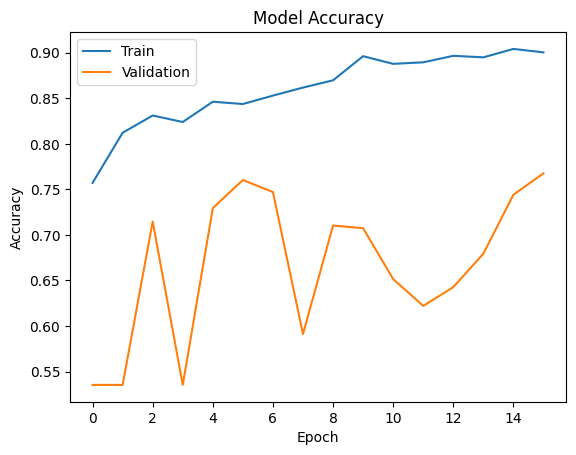

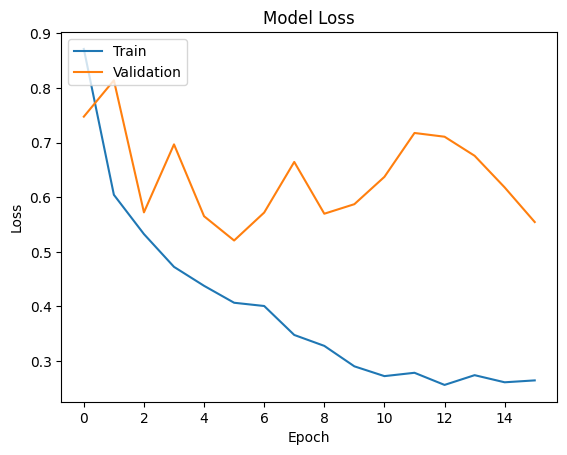

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
import tensorflow as tf


In [ ]:
model_c1=tf.keras.models.load_model('/content/drive/My Drive/Models/{}'.format('0.822'))

In [ ]:
# Assuming 'y_test_one_hot' is your one-hot encoded test labels

# Ensure y_test_one_hot is a one-hot encoded array
#y_test_one_hot = tf.keras.utils.to_categorical(y_test_one_hot)

# Evaluate the model on the test set
score = model_c1.evaluate(X_test, y_test_one_hot)

# Print the test accuracy
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

11/11 [==============================] - 5s 93ms/step - loss: 0.7030 - accuracy: 0.8000
Test Loss: 0.7030428051948547
Test accuracy: 0.800000011920929


In [ ]:
# Assuming you have the true labels for the test set
y_true = np.argmax(y_test_one_hot, axis=1)

# Assuming model_c1 is your classifier model
predictions = model_c1.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

# Create the confusion matrix
confusion_mat = confusion_matrix(y_true, y_pred)

# Define your class names
classes = ['Class 0', 'Class 1']

# Print classification report
print(classification_report(y_true, y_pred, target_names=classes ))

11/11 [==============================] - 1s 51ms/step
              precision    recall  f1-score   support

     Class 0       0.81      0.80      0.80       174
     Class 1       0.79      0.80      0.80       166

    accuracy                           0.80       340
   macro avg       0.80      0.80      0.80       340
weighted avg       0.80      0.80      0.80       340



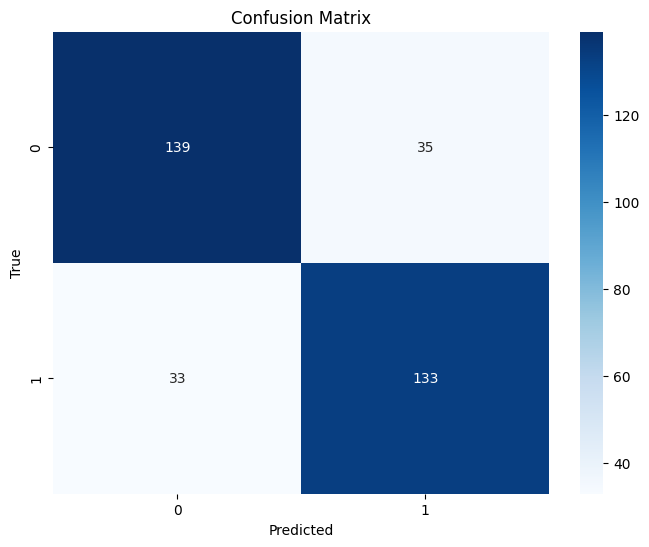

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#NO Error Code

In [ ]:
import os
from PIL import Image
import numpy as np
import re

def load_images_and_labels(main_folder):
    images = []
    labels = []

    # Traverse through the main folder
    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)

        for subsubfolder in os.listdir(subfolder_path):
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)

            for filename in os.listdir(subsubfolder_path):
                file_path = os.path.join(subsubfolder_path, filename)

                # Check if the file_path is a file (not a directory)
                if os.path.isfile(file_path):
                    # Extract numeric values from the filename using regular expressions
                    match = re.search(r'\d+', filename)
                    if match:
                        label = int(match.group())

                        # Read and process the image
                        try:
                            img = Image.open(file_path)
                            # Add the image and label to the lists
                            images.append(np.array(img))
                            labels.append(label)
                            print(f"Successfully read: {file_path}, Label: {label}")
                        except Exception as e:
                            print(f"Error reading {file_path}: {str(e)}")

    return np.array(images), np.array(labels)

# Specify the path to the main folder
main_folder_path = '/content/drive/My Drive/ImageData'

# Load images and labels
images, labels = load_images_and_labels(main_folder_path)

# Print the shape of the loaded data
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)


Streaming output truncated to the last 5000 lines.
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x601_y401_class1.png, Label: 8917
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x1251_y801_class1.png, Label: 8917
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x951_y501_class1.png, Label: 8917
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x1201_y451_class1.png, Label: 8917
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x901_y251_class1.png, Label: 8917
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x1301_y251_class1.png, Label: 8917
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x751_y1001_class1.png, Label: 8917
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x1401_y651_class1.png, Label: 8917
Successfully read: /content/drive/My Drive/ImageData/8917/1/8917_idx5_x551_y801_class1.png, Label: 8917
Successf

<ipython-input-2-821013899a9e>:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [ ]:
import os
from PIL import Image
import numpy as np

def load_images_and_labels(main_folder):
    images = []
    labels = []

    # Traverse through the main folder
    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)

        # Assign label based on the subfolder name (0 or 1)
        label = int(subfolder)

        for subsubfolder in os.listdir(subfolder_path):
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)

            for filename in os.listdir(subsubfolder_path):
                file_path = os.path.join(subsubfolder_path, filename)

                # Check if the file_path is a file (not a directory)
                if os.path.isfile(file_path):
                    # Read and process the image
                    try:
                        img = Image.open(file_path)
                        # Add the image and label to the lists
                        images.append(np.array(img))
                        labels.append(label)
                    except Exception as e:
                        print(f"Error reading {file_path}: {str(e)}")

    return np.array(images), np.array(labels)

# Specify the path to the main folder
main_folder_path = '/content/drive/My Drive/ImageData'

# Load images and labels
images, labels = load_images_and_labels(main_folder_path)

# Print the shape of the loaded data
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)


Shape of images: (9801,)
Shape of labels: (9801,)


<ipython-input-15-1ba4dac4b686>:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [ ]:
import os
from PIL import Image
import numpy as np

def load_images_and_labels(main_folder):
    images = []
    labels = []

    # Traverse through the main folder
    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)

        # Assign label based on the subfolder name (0 or 1)
        label = int(subfolder)

        for subsubfolder in os.listdir(subfolder_path):
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)

            for filename in os.listdir(subsubfolder_path):
                file_path = os.path.join(subsubfolder_path, filename)

                # Read and process the image
                try:
                    img = Image.open(file_path)
                    # Add the image and label to the lists
                    images.append(np.array(img))
                    labels.append(label)
                except Exception as e:
                    print(f"Error reading {file_path}: {str(e)}")

    return np.array(images), np.array(labels)

# Specify the path to the main folder
main_folder_path = '/content/drive/My Drive/ImageData'

# Load images and labels
images, labels = load_images_and_labels(main_folder_path)

# Convert labels to binary (0 or 1)
labels_binary = np.where(labels == 8918, 1, 0)

# Print the shape of the loaded data
print("Shape of images:", images.shape)
print("Shape of labels:", labels_binary.shape)


Shape of images: (9801,)
Shape of labels: (9801,)


<ipython-input-11-978acb448859>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [ ]:
import os
from PIL import Image
import numpy as np

def load_images_and_labels(main_folder):
    images = []
    labels = []

    # Traverse through the main folder
    for subfolder in os.listdir(main_folder):
        subfolder_path = os.path.join(main_folder, subfolder)

        # Assign label based on the subfolder name (0 or 1)
        label = int(subfolder)

        for subsubfolder in os.listdir(subfolder_path):
            subsubfolder_path = os.path.join(subfolder_path, subsubfolder)

            for filename in os.listdir(subsubfolder_path):
                file_path = os.path.join(subsubfolder_path, filename)

                # Read and process the image
                try:
                    img = Image.open(file_path)
                    # Add the image and label to the lists
                    images.append(np.array(img))
                    labels.append(label)
                except Exception as e:
                    print(f"Error reading {file_path}: {str(e)}")

    return np.array(images), np.array(labels)

# Specify the path to the main folder
main_folder_path = '/content/drive/My Drive/ImageData'

# Load images and labels
images, labels = load_images_and_labels(main_folder_path)

# Print the shape of the loaded data
print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)


Shape of images: (9801,)
Shape of labels: (9801,)


<ipython-input-4-71fa1e70e795>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)
